In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel('Data Covid 19.xlsx')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    166326 non-null  object        
 1   continent                                   156370 non-null  object        
 2   location                                    166326 non-null  object        
 3   date                                        166326 non-null  datetime64[ns]
 4   total_cases                                 163293 non-null  float64       
 5   new_cases                                   163133 non-null  float64       
 6   new_cases_smoothed                          161150 non-null  float64       
 7   total_deaths                                145451 non-null  float64       
 8   new_deaths                                  145487 non-null  float64      

In [4]:
data['date'].unique()

array(['2020-02-24T00:00:00.000000000', '2020-02-25T00:00:00.000000000',
       '2020-02-26T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-03-02T00:00:00.000000000',
       '2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22

In [5]:
latest = '2020-02-11T00:00:00.000000000'
data[data['date']==latest]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5895,ARG,South America,Argentina,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
6657,ARM,Asia,Armenia,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5,52.1,94043.00,4.20,75.09,0.776,NaN,NaN,NaN,NaN
8154,OWID_ASI,NaN,Asia,2020-02-11,44589.0,2038.0,2964714.000,1113.0,100.0,88714.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8924,AUS,Oceania,Australia,2020-02-11,15.0,0.0,0.286,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
14810,BEL,Europe,Belgium,2020-02-11,1.0,0.0,0.000,NaN,NaN,NaN,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
25657,KHM,Asia,Cambodia,2020-02-11,1.0,0.0,0.000,NaN,NaN,NaN,...,2.0,33.7,66229.00,0.80,69.82,0.594,NaN,NaN,NaN,NaN
27160,CAN,North America,Canada,2020-02-11,9.0,0.0,0.571,NaN,NaN,NaN,...,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN
31553,CHN,Asia,China,2020-02-11,44327.0,2021.0,2949571.000,1111.0,100.0,88714.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
40560,DNK,Europe,Denmark,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,...,19.3,18.8,NaN,2.50,80.90,0.940,NaN,NaN,NaN,NaN
47128,EST,Europe,Estonia,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,...,24.5,39.3,NaN,4.69,78.74,0.892,NaN,NaN,NaN,NaN


In [6]:
unique_location = data[data.total_cases>0]['location'].unique()
unique_location.sort()
unique_location

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [15]:
country_confirmed_case = []
for i in unique_location:
  country_confirmed_case.append(data[data.total_cases>0][data['location']==i][data['date']==latest].total_cases.sum())

<ipython-input-15-f72da54ea42c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.total_cases>0][data['location']==i][data['date']==latest].total_cases.sum())


In [16]:
print(set(zip(unique_location, country_confirmed_case)))

{('Guatemala', 0.0), ('Bhutan', 0.0), ('Bolivia', 0.0), ('Kiribati', 0.0), ('Saudi Arabia', 0.0), ('Austria', 0.0), ('Ethiopia', 0.0), ('Montserrat', 0.0), ('China', 44327.0), ('Angola', 0.0), ('Belize', 0.0), ('Congo', 0.0), ('Namibia', 0.0), ('Taiwan', 18.0), ('Lower middle income', 24.0), ('Cayman Islands', 0.0), ('Sierra Leone', 0.0), ('Ukraine', 0.0), ('Sri Lanka', 1.0), ('Tonga', 0.0), ('Haiti', 0.0), ('Marshall Islands', 0.0), ('International', 135.0), ('Trinidad and Tobago', 0.0), ('Morocco', 0.0), ('Bahamas', 0.0), ('Nepal', 1.0), ('Tanzania', 0.0), ('Bangladesh', 0.0), ('Bonaire Sint Eustatius and Saba', 0.0), ('Estonia', 0.0), ('Dominican Republic', 0.0), ('San Marino', 0.0), ('United Kingdom', 15.0), ('Eswatini', 0.0), ('European Union', 36.0), ('Tunisia', 0.0), ('Afghanistan', 0.0), ('Cook Islands', 0.0), ('Burkina Faso', 0.0), ('Algeria', 0.0), ('Bahrain', 0.0), ('Slovenia', 0.0), ('Cyprus', 0.0), ('Dominica', 0.0), ('Peru', 0.0), ('Cuba', 0.0), ('Maldives', 0.0), ('Oman'

In [17]:
unique_continent = data['continent'][data.total_cases>1].unique()
unique_continent

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [18]:
continent_confirmed_case = []
for i in unique_continent:
  continent_confirmed_case.append(data[data.total_cases>0][data['continent']==i][data['date']==latest].total_cases.sum())

<ipython-input-18-a06da1c64153>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  continent_confirmed_case.append(data[data.total_cases>0][data['continent']==i][data['date']==latest].total_cases.sum())


In [19]:
print(set(zip(unique_continent, continent_confirmed_case)))

{(nan, 0.0), ('South America', 0.0), ('North America', 22.0), ('Oceania', 15.0), ('Africa', 0.0), ('Europe', 53.0), ('Asia', 44589.0)}


In [20]:
nan_indices = []
for i in range(len(unique_continent)):
  if type(unique_continent[i])==float:
    nan_indices.append(i)

In [22]:
unique_continent = list(unique_continent)
continent_confirmed_case = list(continent_confirmed_case)

In [23]:
for i in nan_indices:
  unique_continent.pop(i)
  continent_confirmed_case.pop(i)

unique_continent

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

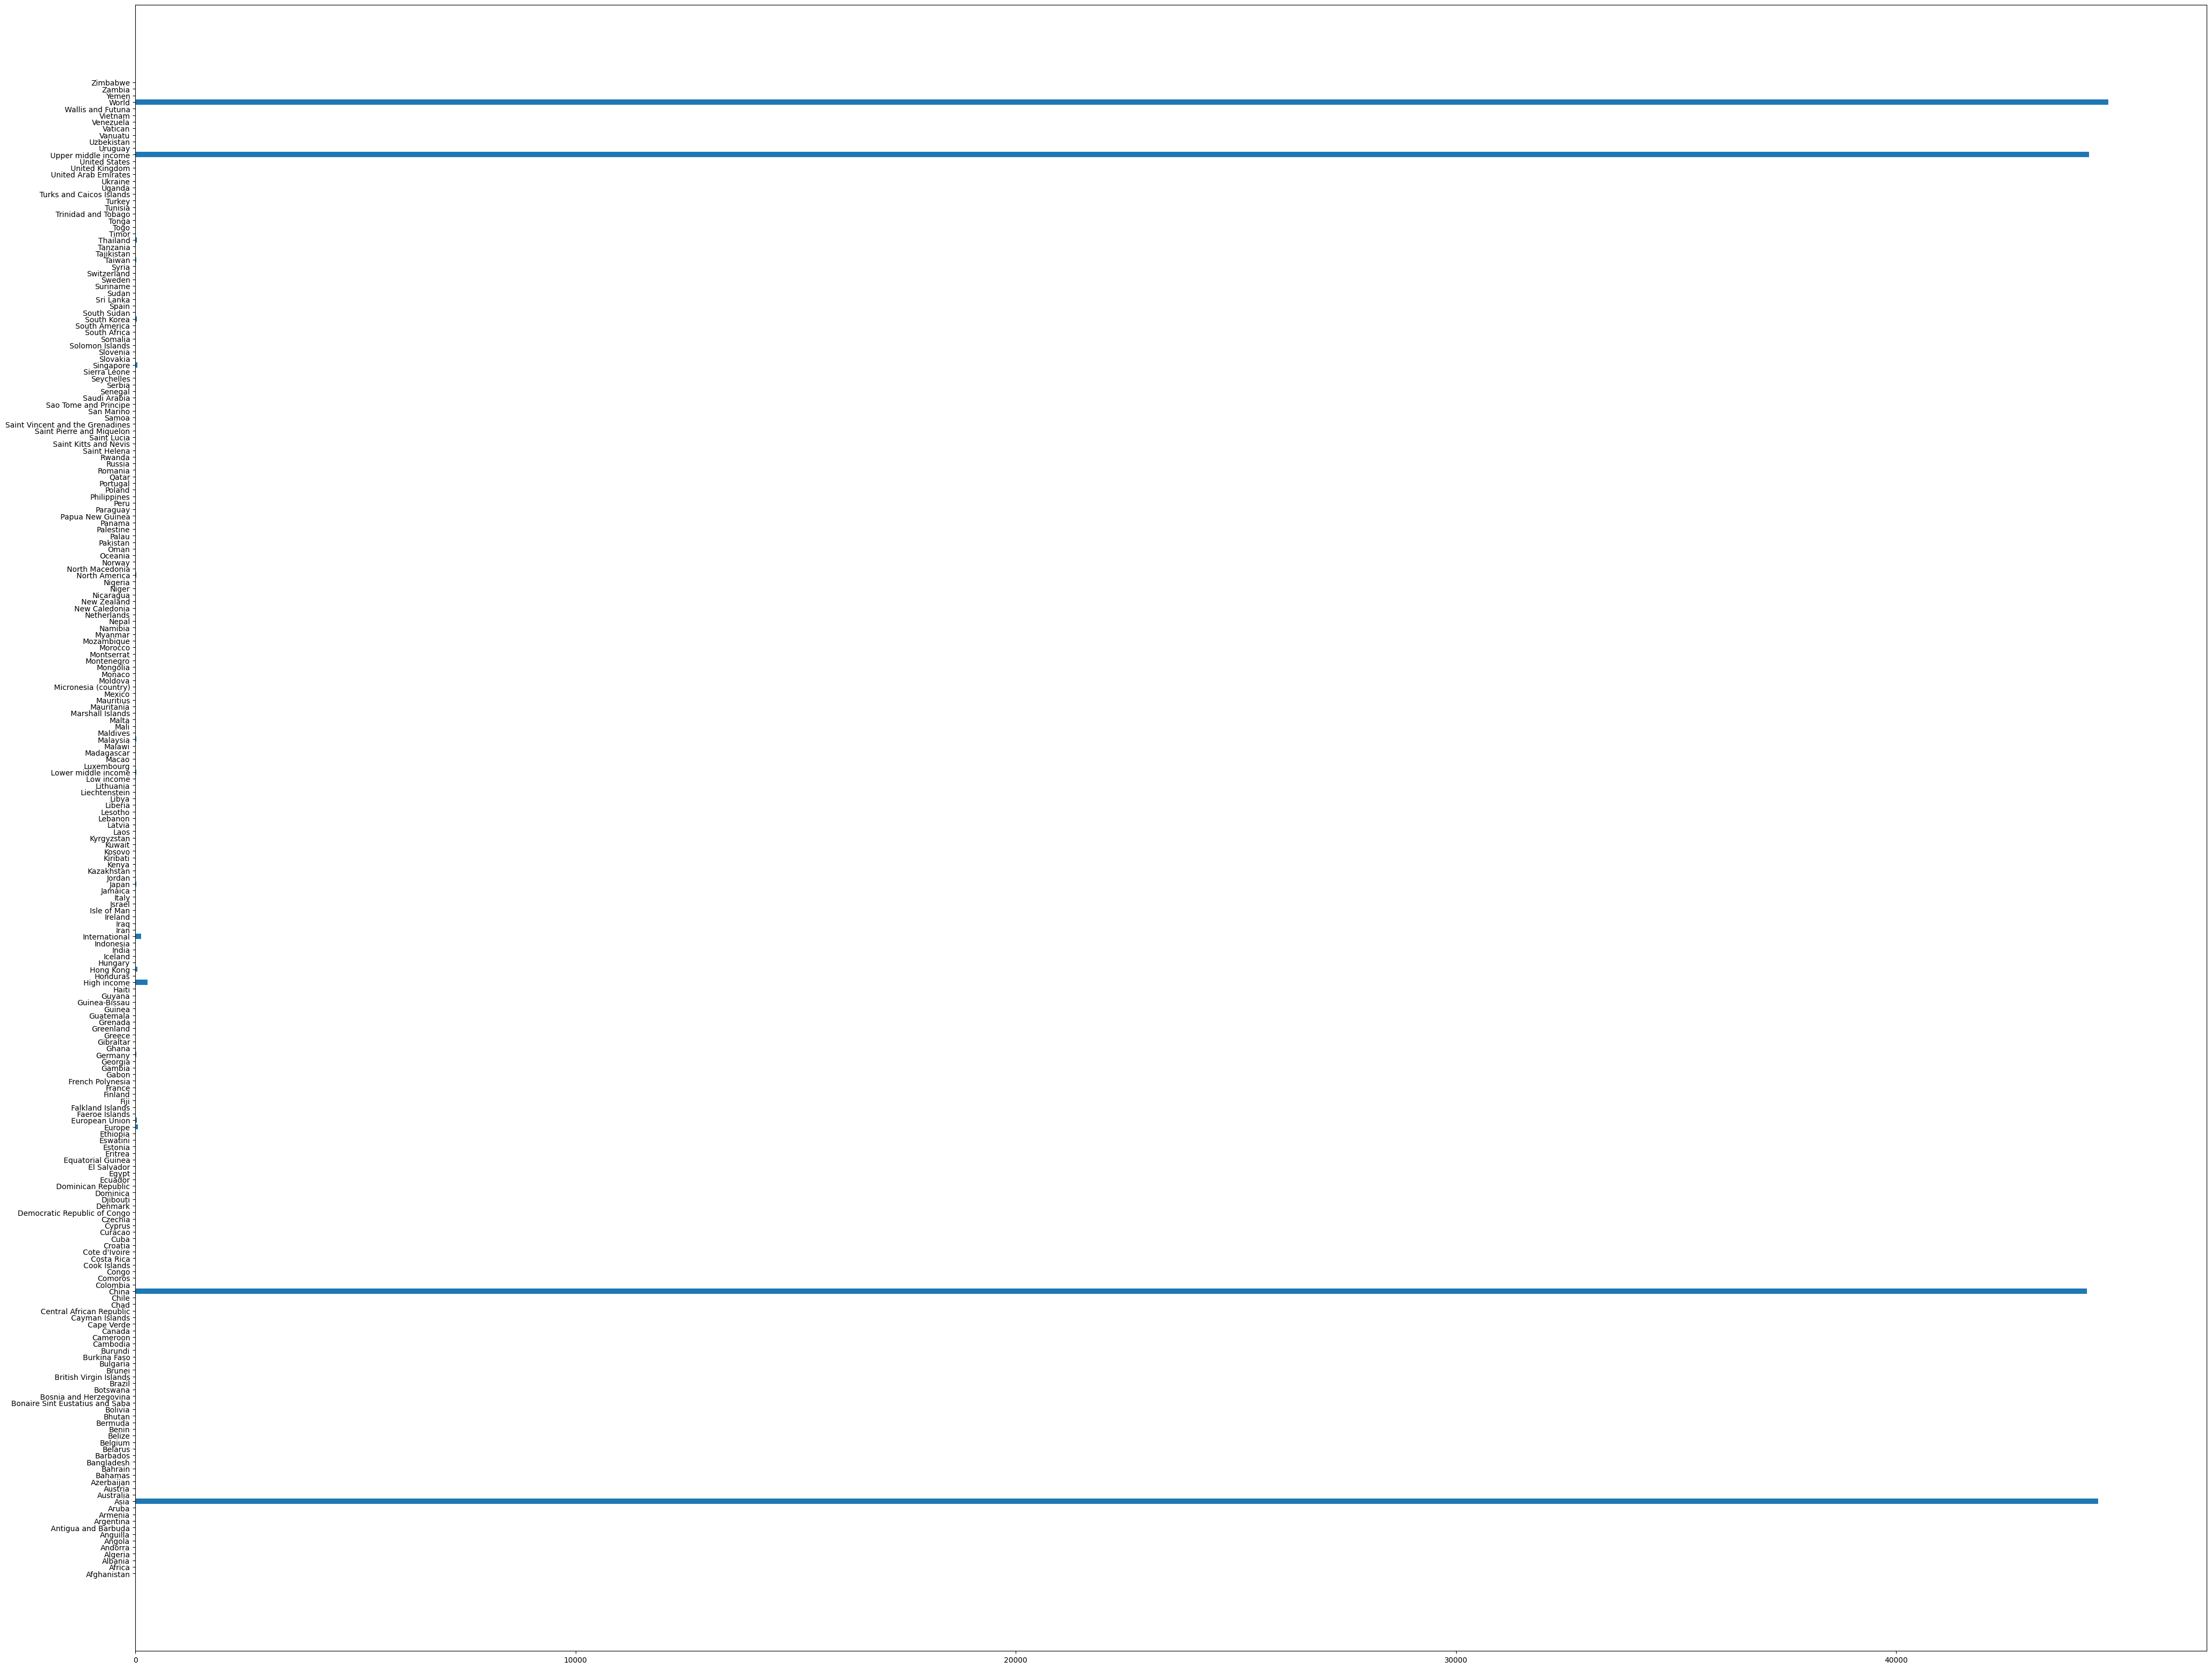

In [28]:
plt.figure(figsize=(50,40))
plt.barh(unique_location, country_confirmed_case)
plt.show()

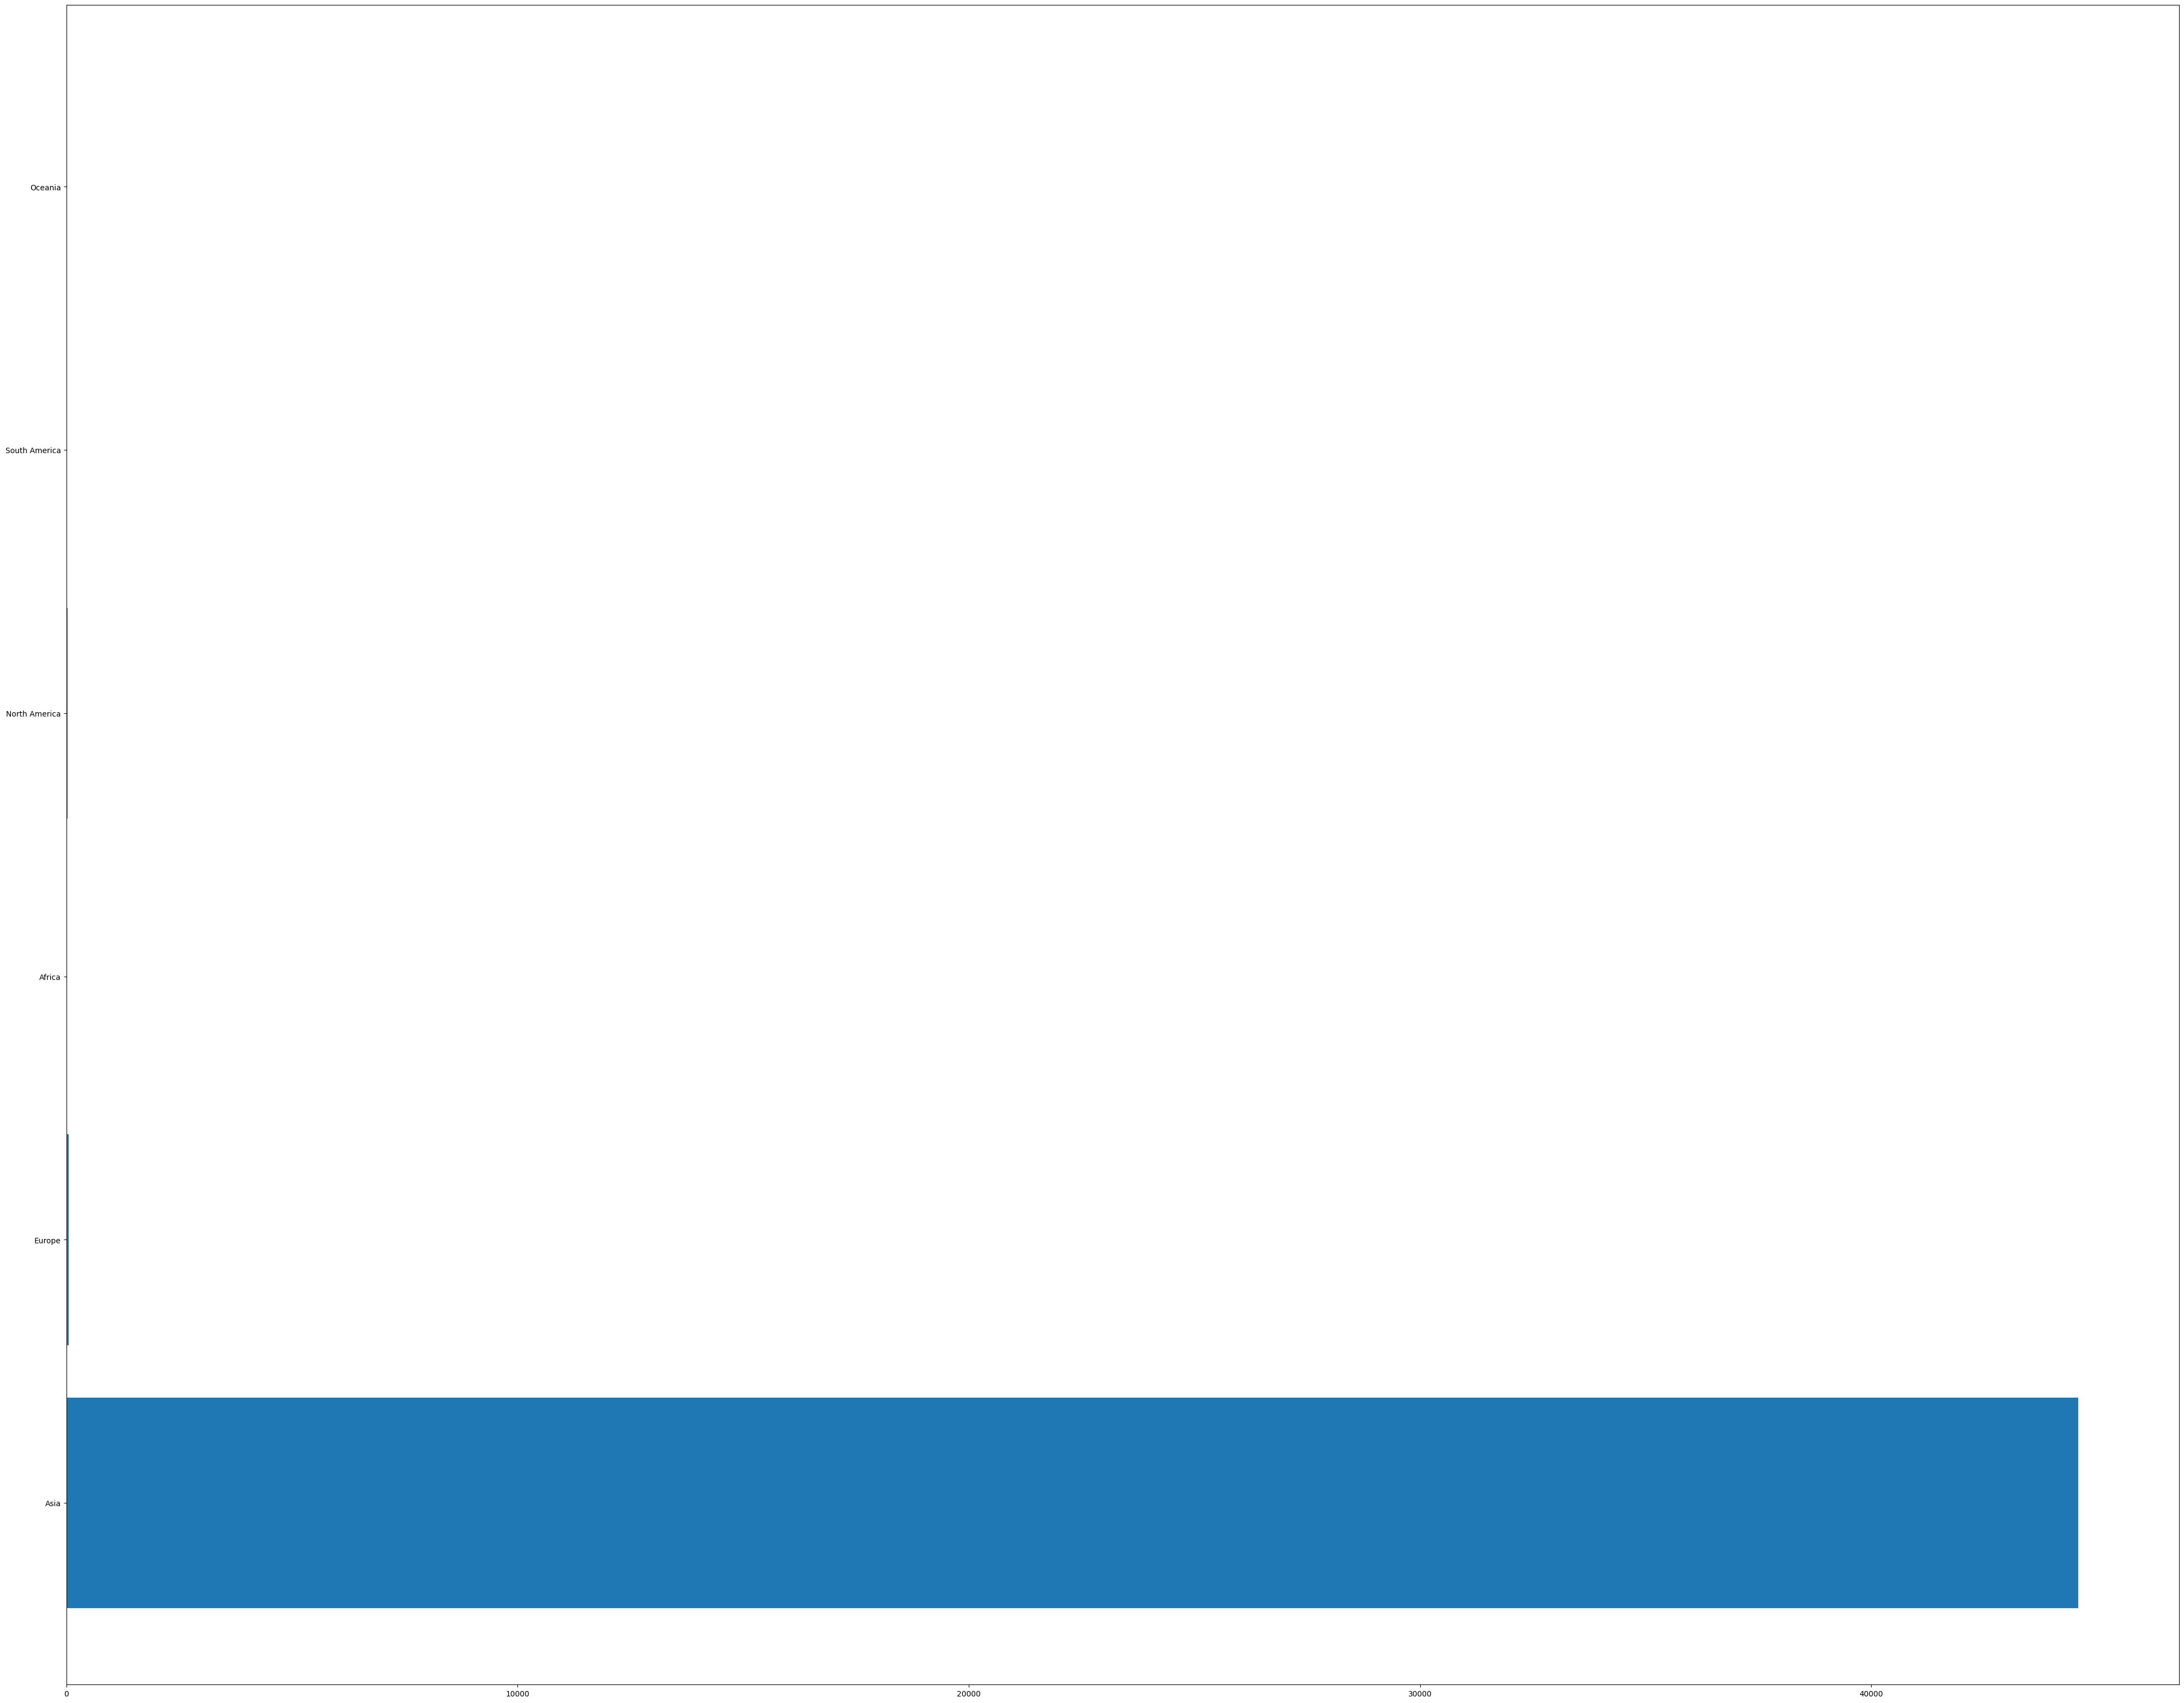

In [25]:
plt.figure(figsize=(50,40))
plt.barh(unique_continent, continent_confirmed_case)
plt.show()

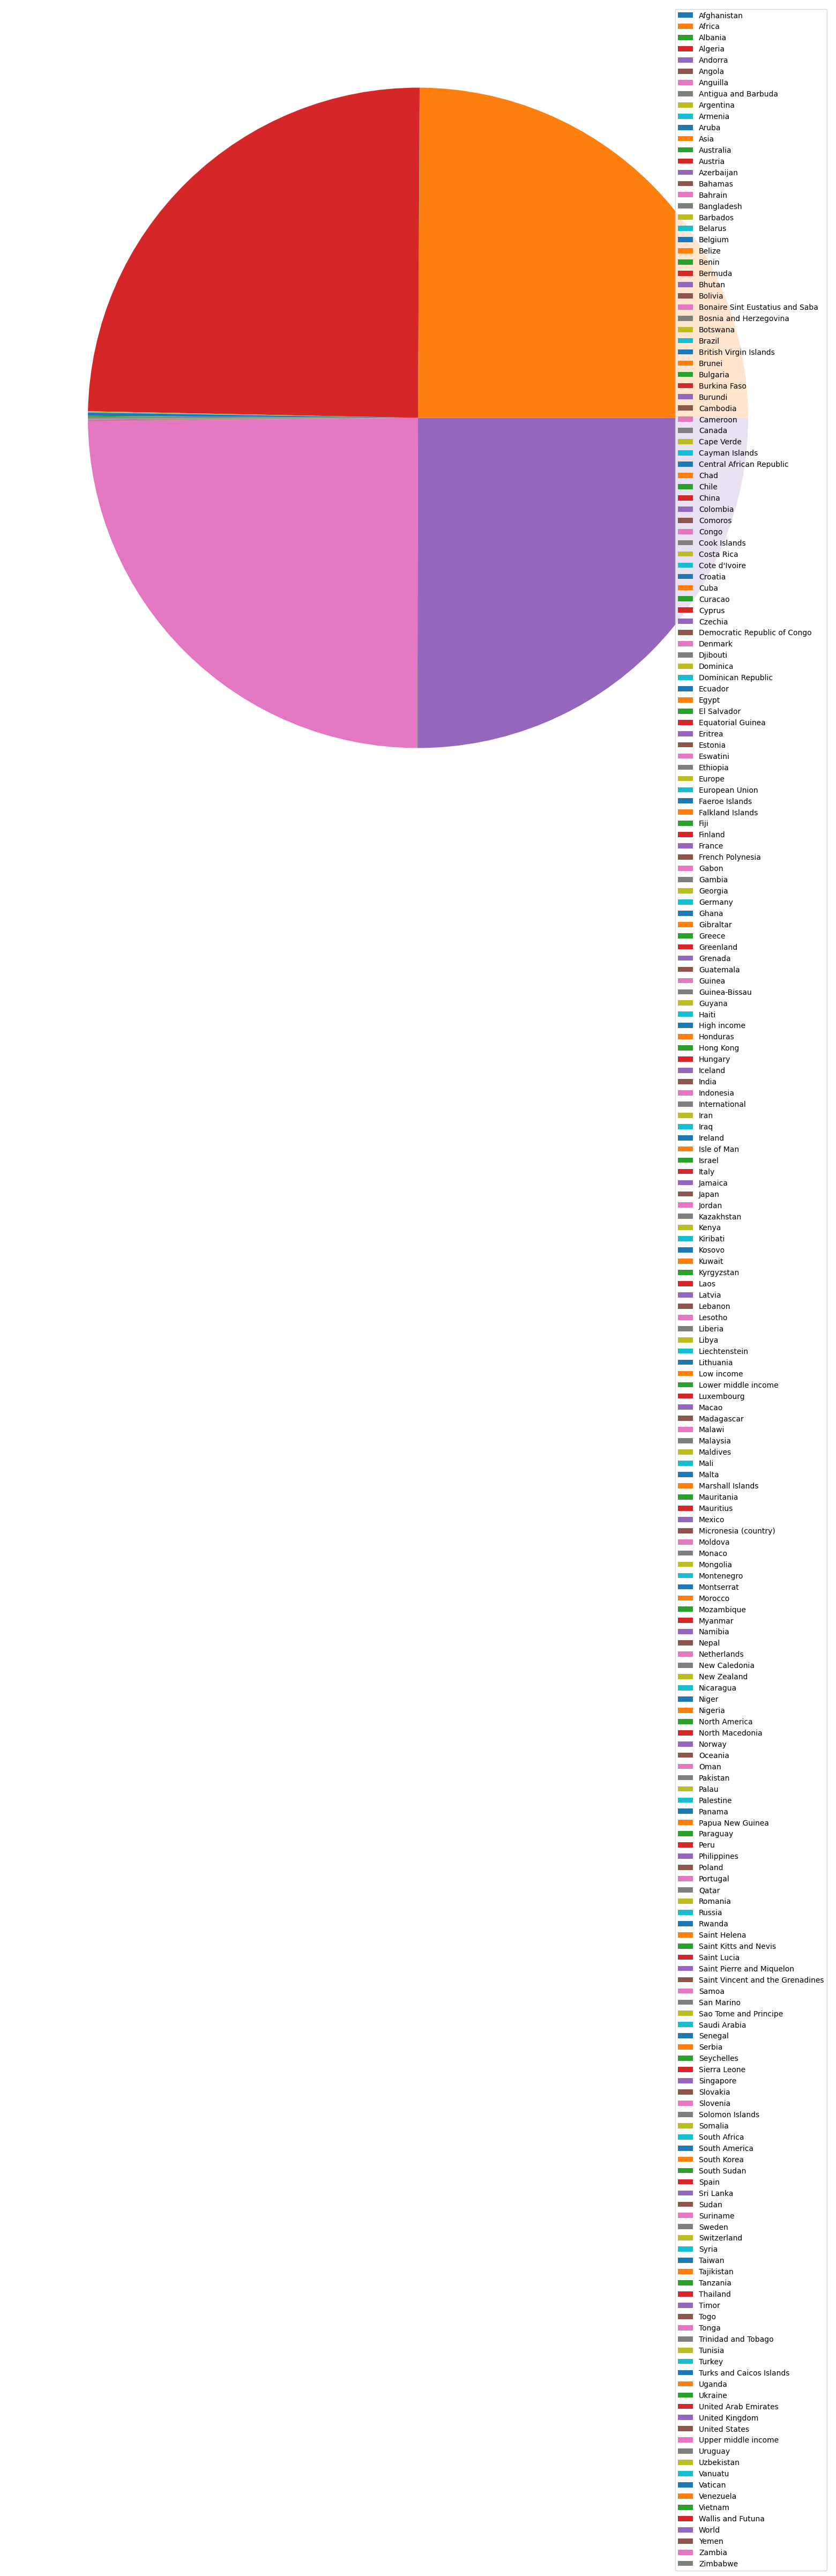

In [30]:
plt.figure(figsize=(20,20))
plt.pie(country_confirmed_case)
plt.legend(unique_location, loc='best')
plt.show()

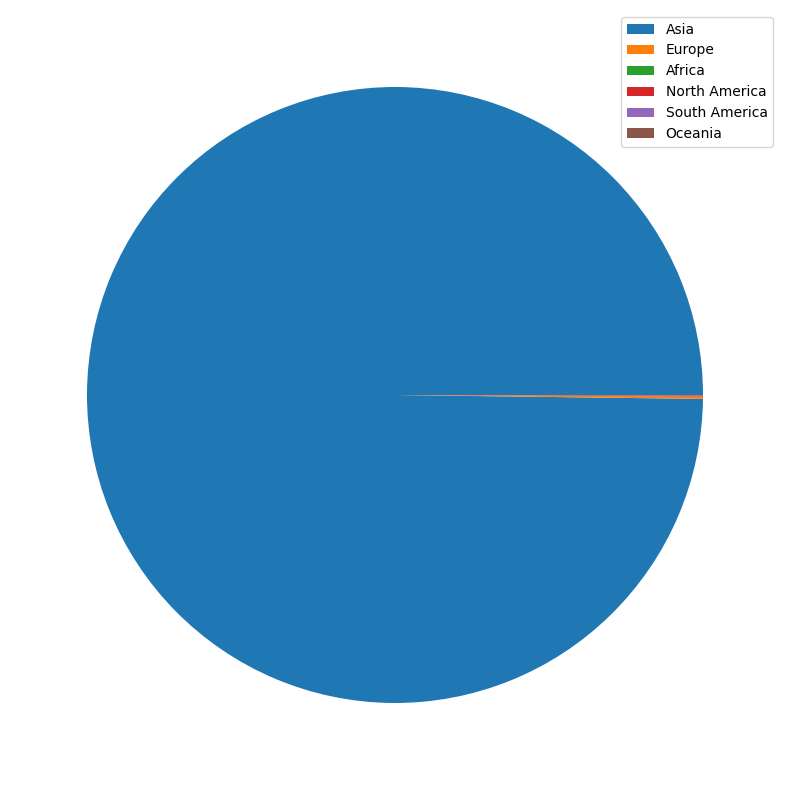

In [31]:
plt.figure(figsize=(10,10))
plt.pie(continent_confirmed_case)
plt.legend(unique_continent, loc='best')
plt.show()